# This notebook will help fix the get Visible algorithm!

In [1]:
## Import statements
import xarray
import numpy as np
import pyart
import metpy.calc as metcalc
from metpy.units import units
import proplot as pplt
import cv2 as cv2

import math
import matplotlib.pyplot as pl
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from PIL import Image

import os, glob
import wildfire2 as wf2

import datetime
from netCDF4 import Dataset as ncDataset
import cartopy.crs as ccrs
import pyproj
import rasterio.crs
from rasterio import Affine
from rasterio.warp import reproject, Resampling
from rasterio.mask import mask
import numpy.ma as ma

import shapely
from shapely import geometry
from matplotlib import cm
import fiona

import satpy.modifiers.parallax as smp

from cartopy_map_utils import proj4_to_cartopy
import model as md
import echotop as et


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/196/jv1871/echotop.py:24: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def cloud_top_height(
/home/196/jv1871/echotop.py:132: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def column_max_reflectivity(r, azimuth, elevation, st_sweep, ed_sweep, refl):


In [2]:
import matplotlib.pyplot as plt

In [3]:
year = 2019
month = 12
day = 28
time = '0600'
minLat = -38
maxLat = -35
minLon = 149
maxLon = 151

In [4]:
## This method gets the satellite data for a particular channel.
## It then returns the data for the channel in question and the resolution.
def getSatelliteData(year, month, day, time, channel):
    path_sat = f'/g/data/ra22/satellite-products/arc/obs/himawari-ahi/fldk/latest/{year}/{month}/{day}/{time}/'
    if (channel == 'f1'):
        ## Visible Channels
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B01-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'f2'):
        ## Part of Visible Channels
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B02-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'f3'):
        ## Part of Visible Channels
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B03-PRJ_GEOS141_500-HIMAWARI8-AHI.nc'))
        resolution = 500
        return (data, resolution)
    elif (channel == 'f7'):
        ## Brightness Temperature 4µm channel 
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B07-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f14'):
        ## Brightness Temperature 11µm channel
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B14-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f16'):
        ## Brightness Temperature 13µm channel
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B16-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f4'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B04-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'f5'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B05-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f6'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f13'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B13-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'fr1'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B01-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'fr2'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B02-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'fr3'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B03-PRJ_GEOS141_500-HIMAWARI8-AHI.nc'))
        resolution = 500
        return (data, resolution)
    elif (channel == 'fr4'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B04-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'fr5'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B05-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'fr6'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f_sza'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_GEOM_SOLAR-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'ctth'):
        path_para = f'/g/data/rv74/satellite-products/arc/der/himawari-ahi/cloud/ctth/{year}/{month}/{day}/'
        f_para = path_para + f'S_NWC_CTTH_HIMA08_HIMA-N-NR_{year}{month}{day}T{time}00Z.nc'
        data = xarray.open_dataset(f_para)
        return (data, np.nan)

In [5]:
## This method will get the x and y boundaries for the specified lat and lon given.
def getXYBoundaries(year, month, day, time, minLat, maxLat, minLon, maxLon):
    ## This will get the solar zenith angle data for the array. This channel is commonly used for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    # Convert to a pyproj object
    fsza_proj4string = f_sza.geostationary.proj4
    p = pyproj.Proj(fsza_proj4string)

    ## Find the x and y values associated with the two opposite corners of the image.
    x1, y2 = p(minLon, minLat)
    x2, y1 = p(maxLon, maxLat)

    return (x1, x2, y2, y1)

In [6]:
## This method will upgrid a non-square array, given the original sizes, newSizes, and of course the data.
def RectangleUpGrid(data, originalI, originalJ, newI, newJ):
    ## Calculates the conversion factors for the corresponding sides.
    i_conversion_factor = int((newI/originalI))
    j_conversion_factor = int((newJ/originalJ))
    step1 = np.zeros((newI, originalJ))
    ## Scaling up i axis first
    i_counter = 0
    ## Manually adds each new element into step1.
    for i in range(newI):
        ## Only updates the i_counter for every conversion_factorith iteration (i.e. only needs to be updated for every 2nd, 4th, etc. iteration)
        if (i % i_conversion_factor == 0 and i_counter < originalI):
            i_counter += 1
        step1[i,:] = data[i_counter-1, :]
    final = np.zeros((newI, newJ))

    ## Now scaling up j axis
    i_counter = 0
    ## Manually adds each new element into final array.
    for i in range(newJ):
        ## Only updates the i_counter for every conversion_factorith iteration (i.e. only needs to be updated for every 2nd, 4th, etc... iteration)
        if (i % j_conversion_factor == 0 and i_counter < originalJ):
            i_counter += 1
        final[:,i] = step1[:, i_counter-1]
    return final

In [7]:
## This is a new method to filter the data based on desired latitude and longitude coordinates. The only inputs are the coordinates, x, and y values of the array.
def newFilterData(year, month, day, time, data, minLat, maxLat, minLon, maxLon, x, y):
    ## This will get the solar zenith angle data for the array. This channel is commonly used for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    ## Convert to a pyproj object.
    fsza_proj4string = f_sza.geostationary.proj4
    p = pyproj.Proj(fsza_proj4string)

    ## Find the x and y values associated with the two opposite corners of the image.
    x1, y2 = p(minLon, minLat)
    x2, y1 = p(maxLon, maxLat)
    ## Finds the position that is closest to the x and y values calculated above.
    x1Index = (np.abs(x - x1)).argmin()
    x2Index = (np.abs(x - x2)).argmin()
    y1Index = (np.abs(y - y1)).argmin()
    y2Index = (np.abs(y - y2)).argmin()

    ##Throughout the dataset, y comes first and then x, so it is therefore necessary to flip the output of y and x as a result of how this was programmed. 
    ## Actually performed.
    newData = data[y1Index:y2Index, x1Index:x2Index]
    newX = x[x1Index:x2Index]
    newY = y[y1Index:y2Index]
    return (newData, newY, newX)

In [8]:
## This is a method to scale up the x and y values of an array from originalSize to a bigger newSize.
def upGridXY(old_x, old_y, originalSize, newSize):
    ## Conversion factor determines the factor that the new array is being changed by.
    conversion_factor = int((newSize/originalSize))
    newX = np.zeros(newSize)
    newY = np.zeros(newSize)
    counter = 0
    ## Goes through the newArray and mnaually adds each element into the new data array.
    for i in range(newSize):
        newX[i] = old_x[counter-1]
        newY[i] = old_y[counter-1]
        ## Only on every conversion_factorith iteration (i.e. 2nd or 4th) does the counter need to be updated. For all other times,it simply rereads the data from the last run.
        if (i % conversion_factor == 0):
            counter += 1
    finalX = np.zeros(newSize)
    finalY = np.zeros(newSize)
    finalX[0:-1] = newX[1:]
    finalX[-1] = newX[0]

    ## As a result of my incompetence (and it's a very easy fix in the above code), the first element should be in the last position in the array. The below process works to make this happen in each of the Y and X arrays.
    finalY[0:-1] = newY[1:]
    finalX[-1] = newX[0]
    return finalX, finalY

In [9]:
## This method will perform parallax correction on a high-resolution image. The only inputs are the dataset in question, coordinates, and date/time.
def get_HighRes_shifted_array(data, minLat, maxLat, minLon, maxLon, year, month, day, time):
    ## Get data corresponding to ctth - cloud top height 
    ctth = getSatelliteData(year, month, day, time, "ctth")[0]
    ctth_data = ctth['ctth_alti'].values
    ctth_x = ctth['nx'].values
    ctth_y = ctth['ny'].values
    ## The cloud top height data also needs to be transformed into a higher resolution dataset. To do this, it needs to be upgrided to a resolution of 500m. 
    up_sza = cv2.resize(ctth_data, (22000, 22000))
    nx, ny = upGridXY(ctth_x, ctth_y, len(ctth_x), 22000)

    ## Filters the data using the desired coordinates.
    new_ctth, new_nx, new_ny = newFilterData(year, month, day, time, up_sza, minLat, maxLat, minLon, maxLon, 
                                          nx, ny)

    ## Gets the solar zenith angle dataset for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    fsza_proj4string = f_sza.geostationary.proj4
    ## Create a pyproj object to etxract longitude (center of satellite) and height of the satellite.
    b = pyproj.CRS.from_string(fsza_proj4string)
    a = b.to_dict()
    lat = a['lon_0']
    height = a['h']

    ## Calculates the latitude and longitude form the x and y values of the array.
    lat2d, lon2d = md.calc_lat_lon_from_proj(fsza_proj4string, new_nx, new_ny)
    ## Finds the correct latitude and longitude for each pixel within the specified array.
    corr_lon, corr_lat = smp.get_parallax_corrected_lonlats(lat, 0, height, lon2d, lat2d, new_ctth)

    ## Calculates the shift needed on each pixel.
    shift_lon = corr_lon - lon2d
    shift_lat = corr_lat - lat2d
    
    n, m = shift_lon.shape
    shift_500 = np.empty((n, m, 2))
    shift_500[:, :, 0] = shift_lon
    shift_500[:, :, 1] = shift_lat
    ## Uses Louis' method to convert the shift from latitude/longitude cooridnates into x/y coordinates.
    shift_m_500 = md.get_shift_xy(shift_500, lon2d, lat2d, corr_lon, corr_lat)
    ## Uses Louis' method to actually perform the shift.
    shifted_arr = md.get_shifted_arr(shift_500, shift_m_500, data, 500)

    return shifted_arr

In [10]:
## This method will perform parallax correction on a high resolution image. The only inputs are the dataset in question, coordinates and date/time. 
def new_get_HighRes_shifted_array(data, minLat, maxLat, minLon, maxLon, year, month, day, time):
    ## Gets data corresponding to ctth - cloud top height.
    ctth = getSatelliteData(year, month, day, time, "ctth")[0]
    ctth_data = ctth['ctth_alti'].values
    ctth_x = ctth['nx'].values
    ctth_y = ctth['ny'].values
    ## The cloud top height data needs to be transformed into a higher resolution dataset. To do this, it needs to be upgrided to a resolution of 500m.
    up_sza = cv2.resize(ctth_data, (22000, 22000))
    nx, ny = upGridXY(ctth_x, ctth_y, len(ctth_x), 22000)


    ## Filters the data using the desired coordinates.
    new_ctth, new_nx, new_ny = newFilterData(year, month, day, time, up_sza, minLat, maxLat, minLon, maxLon, 
                                          nx, ny)

    ## Gets the solar zenith angle dataset for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    fsza_proj4string = f_sza.geostationary.proj4
    ## Create a pyproj object to extract longitude (center of satellite) and height of the satellite.
    b = pyproj.CRS.from_string(fsza_proj4string)
    a = b.to_dict()
    lat = a['lon_0']
    height = a['h']

    ## Calculates the latitude and longitude from the x and y values of the array.
    lat2d, lon2d = md.calc_lat_lon_from_proj(fsza_proj4string, new_nx, new_ny)
    ## Finds the correct latitude and longitude for eaxh pixel within the specified array.
    corr_lon, corr_lat = smp.get_parallax_corrected_lonlats(lat, 0, height, lon2d, lat2d, new_ctth)

    ## Calculates the shift needed on each pixel.
    shift_lon = corr_lon - lon2d
    shift_lat = corr_lat - lat2d
    
    n, m = shift_lon.shape
    shift_500 = np.empty((n, m, 2))
    shift_500[:, :, 0] = shift_lon
    shift_500[:, :, 1] = shift_lat

    shift_m_500 = np.zeros_like(shift_500)

    ## The below code converts the longitude and latitude coordinates into x and y values.

    R = 6373.0 * 1000 ## This represents the radius of the earth in meters.
    ## Need to convert to radians...
    lat2d_rad = np.radians(lat2d) 
    lon2d_rad = np.radians(lon2d)
    corr_lon_rad = np.radians(corr_lon)
    corr_lat_rad = np.radians(corr_lat)
    
    ## First implementation -- finding the longitude distance
    shift1_lon = lon2d_rad - corr_lon_rad
    shift1_lat = lat2d_rad - lat2d_rad
    a = np.sin(shift1_lat / 2)**2 + np.cos(lat2d_rad) * np.cos(lat2d_rad) * np.sin(shift1_lon / 2)**2
    x = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    x *= R
    
    ## Second implementation -- finding the latitude distance
    shift2_lon = lon2d_rad - lon2d_rad
    shift2_lat = lat2d_rad - corr_lat_rad
    a = np.sin(shift2_lat / 2)**2 + np.cos(lat2d_rad) * np.cos(corr_lat_rad) * np.sin(shift2_lon / 2)**2
    y = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    y *= R

    shift_m_500[:, :, 0] = x
    shift_m_500[:, :, 1] = y

    ## Performs the shift on the array.
    shifted_arr = md.get_shifted_arr(shift_500, shift_m_500, data, 500)

    return shifted_arr

In [11]:
## Interpolates the data using Louis' method.
def interpolate(data):
    try :
        interpolated_data = md.interpolate_missing_pixels(data, np.isnan(data), method = 'nearest')
    except Exception as e :
        print("Here")
        interpolated_data = data

    return interpolated_data

In [12]:
## This method takes the visible imagery from three separate channels and comvines them to make one visible image.
def getVisible(f1, f2, f3):
    vmin = 0
    vmax = .5

    ## Assigns the channels a value between 0 and 255.
    B1 = f1.clip(vmin, vmax) / vmax * 255
    B2 = f2.clip(vmin, vmax) / vmax * 255
    B3 = f3.clip(vmin, vmax) / vmax * 255

    ## Stacks the channels on top of each other required for visible imagery.
    rgb = np.stack((B3, B2, B1), axis=2).astype('uint8')
    return rgb

In [25]:
## This method will provide a high-resolution satellite image for a specified area. Thsi takes in the date and time, and the specified coordinates, and returns a high-resolution visible image of an area.
def getHighResCroppedVisible(year, month, day, time, minLat, maxLat, minLon, maxLon):
    ## Gets the data from three visible channels
    f1 = getSatelliteData(year, month, day, time, 'f1')[0]
    f2 = getSatelliteData(year, month, day, time, 'f2')[0]
    f3 = getSatelliteData(year, month, day, time, 'f3')[0]
    
    b1x = f1.x.values
    b1y = f1.y.values

    ## Filters the data so only the specified cooridnates appear in the image.
    filter_b1 = newFilterData(year, month, day, time, f1.channel_0001_scaled_radiance.values, minLat, maxLat, minLon, maxLon, b1x, b1y)[0]
    filter_b2 = newFilterData(year, month, day, time, f2.channel_0002_scaled_radiance.values, minLat, maxLat, minLon, maxLon, b1x, b1y)[0]
    filter_b3 = newFilterData(year, month, day, time, f3.channel_0003_scaled_radiance.values, minLat, maxLat, minLon, maxLon, f3.x.values, f3.y.values)[0]

    ## Resizes the array using cv2's resize method rather than my own upgrid_method.
    up_b1 = cv2.resize(filter_b1, (filter_b3.shape[1], filter_b3.shape[0]))
    up_b2 = cv2.resize(filter_b2, (filter_b3.shape[1], filter_b3.shape[0]))

    ## Performs the parallax correction on the image - See method for more detailed information on why this is needed.
    shifted_arr1 = new_get_HighRes_shifted_array(up_b1, minLat, maxLat, minLon, maxLon, year, month, day, time)
    shifted_arr2 = new_get_HighRes_shifted_array(up_b2, minLat, maxLat, minLon, maxLon, year, month, day, time)
    shifted_arr3 = new_get_HighRes_shifted_array(filter_b3, minLat, maxLat, minLon, maxLon, year, month, day, time)

    ## Interpolates any missing pixels that are in the image by finding values from surrounding pixels. Pixels may be missing as a result of parallax correction.
    interpolate_b1 = interpolate(shifted_arr1)
    interpolate_b2 = interpolate(shifted_arr2)
    interpolate_b3 = interpolate(shifted_arr3)

    ## Combines the three interpolated channels into one array, the final array necessary for the image. 
    rgb = getVisible(interpolate_b1, interpolate_b2, interpolate_b3)
    return rgb

In [14]:
## This method will compute the corresponding LCL, given the temperature and humidity.
def compute_LCL(T_arr, Hu_arr):
    ## Input, T_final array, Hu_final array that are both of size (m, n)

    lcl_t = np.zeros_like(T_arr)
    lcl_h = np.zeros_like(T_arr)

    ## This method needs to individually compute the LCL for each value, therefore O(n^2) running time is required.
    for i in range(T_arr.shape[0]):
        for j in range(T_arr.shape[1]):
            t = T_arr[i][j]
            hu = Hu_arr[i][j]
            T_units = t * units.degC
            Hu_units = hu * units.percent
            P_units = 1000 * units.hPa # computed from the first level, 1000 hPa here (cf Copernicus's dataset)
            ## Calculates dewpoint
            Td_units = metcalc.dewpoint_from_relative_humidity(T_units, Hu_units)
            ## Calculates the LCL pressure and temperature.
            LCL_P_units, LCL_T_units = metcalc.lcl(P_units, T_units, Td_units)
    
            LCL_T = LCL_T_units.magnitude
            lcl_t[i][j] = LCL_T
            Td = Td_units.magnitude

            a = 125 # constant, expressed in m/°C
            LCL_H = a*(t - Td) # expressed in m
            lcl_h[i][j] = LCL_H
    return (lcl_t, lcl_h)

## Below this point, the code represents attempts to correct the getCroppedVisible/getHighResCroppedVisible methods

In [14]:
f1 = getSatelliteData(year, month, day, time, 'f1')[0]
f2 = getSatelliteData(year, month, day, time, 'f2')[0]
f3 = getSatelliteData(year, month, day, time, 'f3')[0]

In [15]:
xmin, xmax, ymin, ymax = getXYBoundaries(year, month, day, time, minLat, maxLat, minLon, maxLon)
b1x = f1.x.values
b1y = f1.y.values

In [16]:
up_b1 = cv2.resize(f1.channel_0001_scaled_radiance.values, (f3.channel_0003_scaled_radiance.values.shape[0], f3.channel_0003_scaled_radiance.values.shape[1]))
up_b2 = cv2.resize(f2.channel_0002_scaled_radiance.values, (f3.channel_0003_scaled_radiance.values.shape[0], f3.channel_0003_scaled_radiance.values.shape[1]))
b3 = f3.channel_0003_scaled_radiance.values
b1nx, b1ny = upGridXY(b1x, b1y, len(b1x), b3.shape[0])

In [17]:
filter_b1 = newFilterData(year, month, day, time, up_b1, minLat, maxLat, minLon, maxLon, b1nx, b1ny)[0]
filter_b2 = newFilterData(year, month, day, time, up_b2, minLat, maxLat, minLon, maxLon, b1nx, b1ny)[0]
filter_b3 = newFilterData(year, month, day, time, b3, minLat, maxLat, minLon, maxLon, f3.x.values, f3.y.values)[0]
filter_b3 = filter_b3[:, :408]

In [18]:
## Implementing the get_high_res shfited_array function

ctth = getSatelliteData(year, month, day, time, "ctth")[0]
ctth_data = ctth['ctth_alti'].values
ctth_x = ctth['nx'].values
ctth_y = ctth['ny'].values
up_sza = cv2.resize(ctth_data, (22000, 22000))
nx, ny = upGridXY(ctth_x, ctth_y, len(ctth_x), 22000)


new_ctth, new_nx, new_ny = newFilterData(year, month, day, time, up_sza, minLat, maxLat, minLon, maxLon, 
                                          nx, ny)

f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
fsza_proj4string = f_sza.geostationary.proj4
b = pyproj.CRS.from_string(fsza_proj4string)
a = b.to_dict()
lat = a['lon_0']
height = a['h']

/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [19]:
lat2d, lon2d = md.calc_lat_lon_from_proj(fsza_proj4string, new_nx, new_ny)

In [20]:
corr_lon, corr_lat = smp.get_parallax_corrected_lonlats(lat, 0, height, lon2d, lat2d, new_ctth)

shift_lon = corr_lon - lon2d
shift_lat = corr_lat - lat2d
    
n, m = shift_lon.shape
shift_500 = np.empty((n, m, 2))
shift_500[:, :, 0] = shift_lon
shift_500[:, :, 1] = shift_lat

shift_m_500 = np.zeros_like(shift_500)

In [29]:
R = 6373.0 * 1000
lat2d_rad = np.radians(lat2d)
lon2d_rad = np.radians(lon2d)
corr_lon_rad = np.radians(corr_lon)
corr_lat_rad = np.radians(corr_lat)

## First implementation -- finding the longitude distance
shift1_lon = lon2d_rad - corr_lon_rad
shift1_lat = lat2d_rad - lat2d_rad
a = np.sin(shift1_lat / 2)**2 + np.cos(lat2d_rad) * np.cos(lat2d_rad) * np.sin(shift1_lon / 2)**2
x = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
x *= R

## Second implementation -- finding the latitude distance
shift2_lon = lon2d_rad - lon2d_rad
shift2_lat = lat2d_rad - corr_lat_rad
a = np.sin(shift2_lat / 2)**2 + np.cos(lat2d_rad) * np.cos(corr_lat_rad) * np.sin(shift2_lon / 2)**2
y = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
y *= R

In [30]:
x = np.where((x==np.nan), 0, x)
y = np.where((y==np.nan), 0, y)
shift_m_500[:, :, 0] = x
shift_m_500[:, :, 1] = y

In [35]:
shifted_arr_1 = md.get_shifted_arr(shift_500, shift_m_500, filter_b1, 500)
interpolate_1 = interpolate(shifted_arr_1)
shifted_arr_2 = md.get_shifted_arr(shift_500, shift_m_500, filter_b2, 500)
interpolate_2 = interpolate(shifted_arr_2)
shifted_arr_3 = md.get_shifted_arr(shift_500, shift_m_500, filter_b3, 500)
interpolate_3 = interpolate(shifted_arr_3)

In [40]:
rgb2 = getVisible(interpolate_1, interpolate_2, interpolate_3)

In [48]:
rgb3 = getVisible(filter_b1, filter_b2, filter_b3)

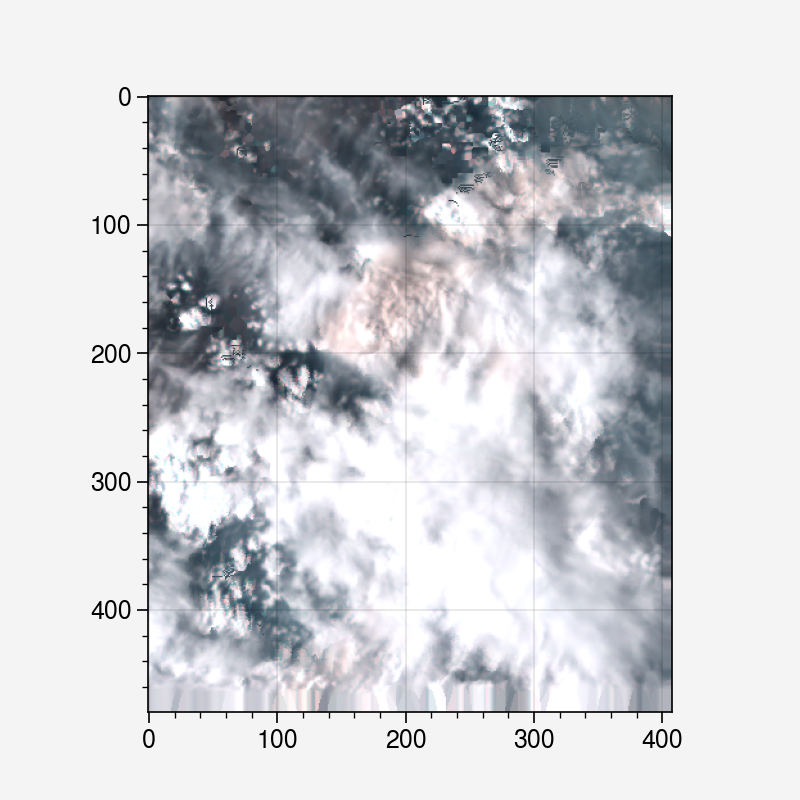

In [37]:
plt.imshow(rgb)

In [26]:
rgb = getHighResCroppedVisible(year, month, day, time, minLat, maxLat, minLon, maxLon)

Here
(480, 408)
(480, 408)
(480, 408)


/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj 

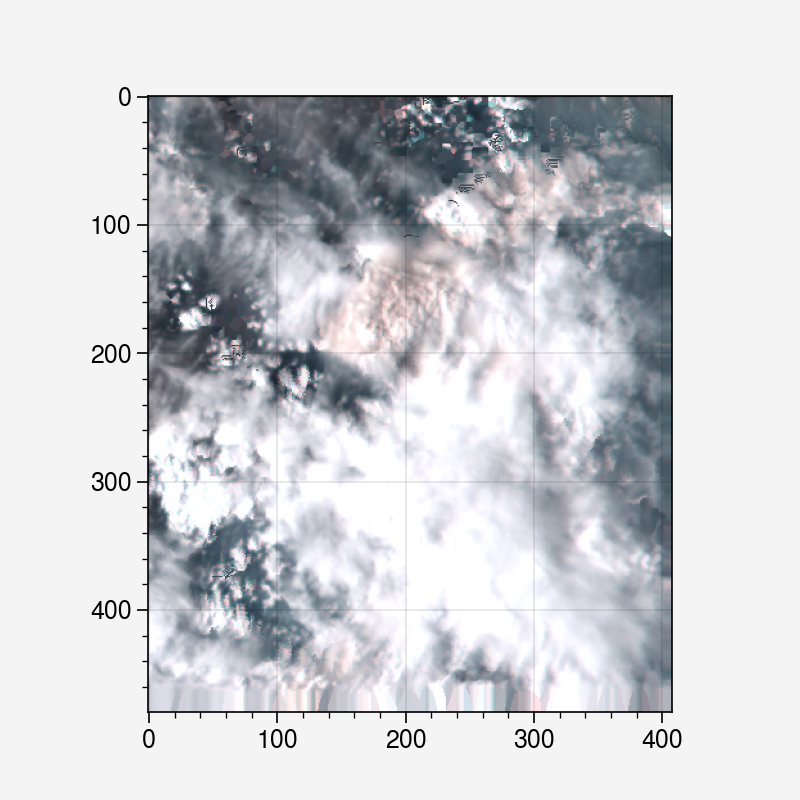

In [27]:
plt.imshow(rgb)